In [10]:
# GBDT（Gradient Boosting Decision Tree）

In [11]:
# 数据准备

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# 生成合成数据
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 转换为 DataFrame 以便绘图
df_train = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])])
df_train['target'] = y_train
df_test = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])
df_test['target'] = y_test

In [12]:
# 1. Gradient Boosting Decision Tree (GBDT)
gbdt_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbdt_model.fit(X_train, y_train)
y_pred_gbdt = gbdt_model.predict(X_test)

In [13]:
# 2. LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 10
[LightGBM] [Info] Start training from score -0.548151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [14]:
# 3. XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [15]:
# 4. AdaBoost

from sklearn.ensemble import AdaBoostRegressor

# 定义决策树作为基学习器
base_estimator = DecisionTreeRegressor(max_depth=3)

# 创建 AdaBoost 回归模型
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=1., random_state=42)

# 训练模型
ada_model.fit(X_train, y_train)

# 进行预测
y_pred_ada = ada_model.predict(X_test)

In [16]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")
print("Performance Comparison:")
evaluate_model(y_test, y_pred_gbdt, "GBDT")
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_ada, "AdaBoost")

Performance Comparison:
GBDT - MSE: 1319.3339, R2: 0.9288
LightGBM - MSE: 1162.0831, R2: 0.9373
XGBoost - MSE: 1854.5063, R2: 0.9000
AdaBoost - MSE: 3857.0280, R2: 0.7919


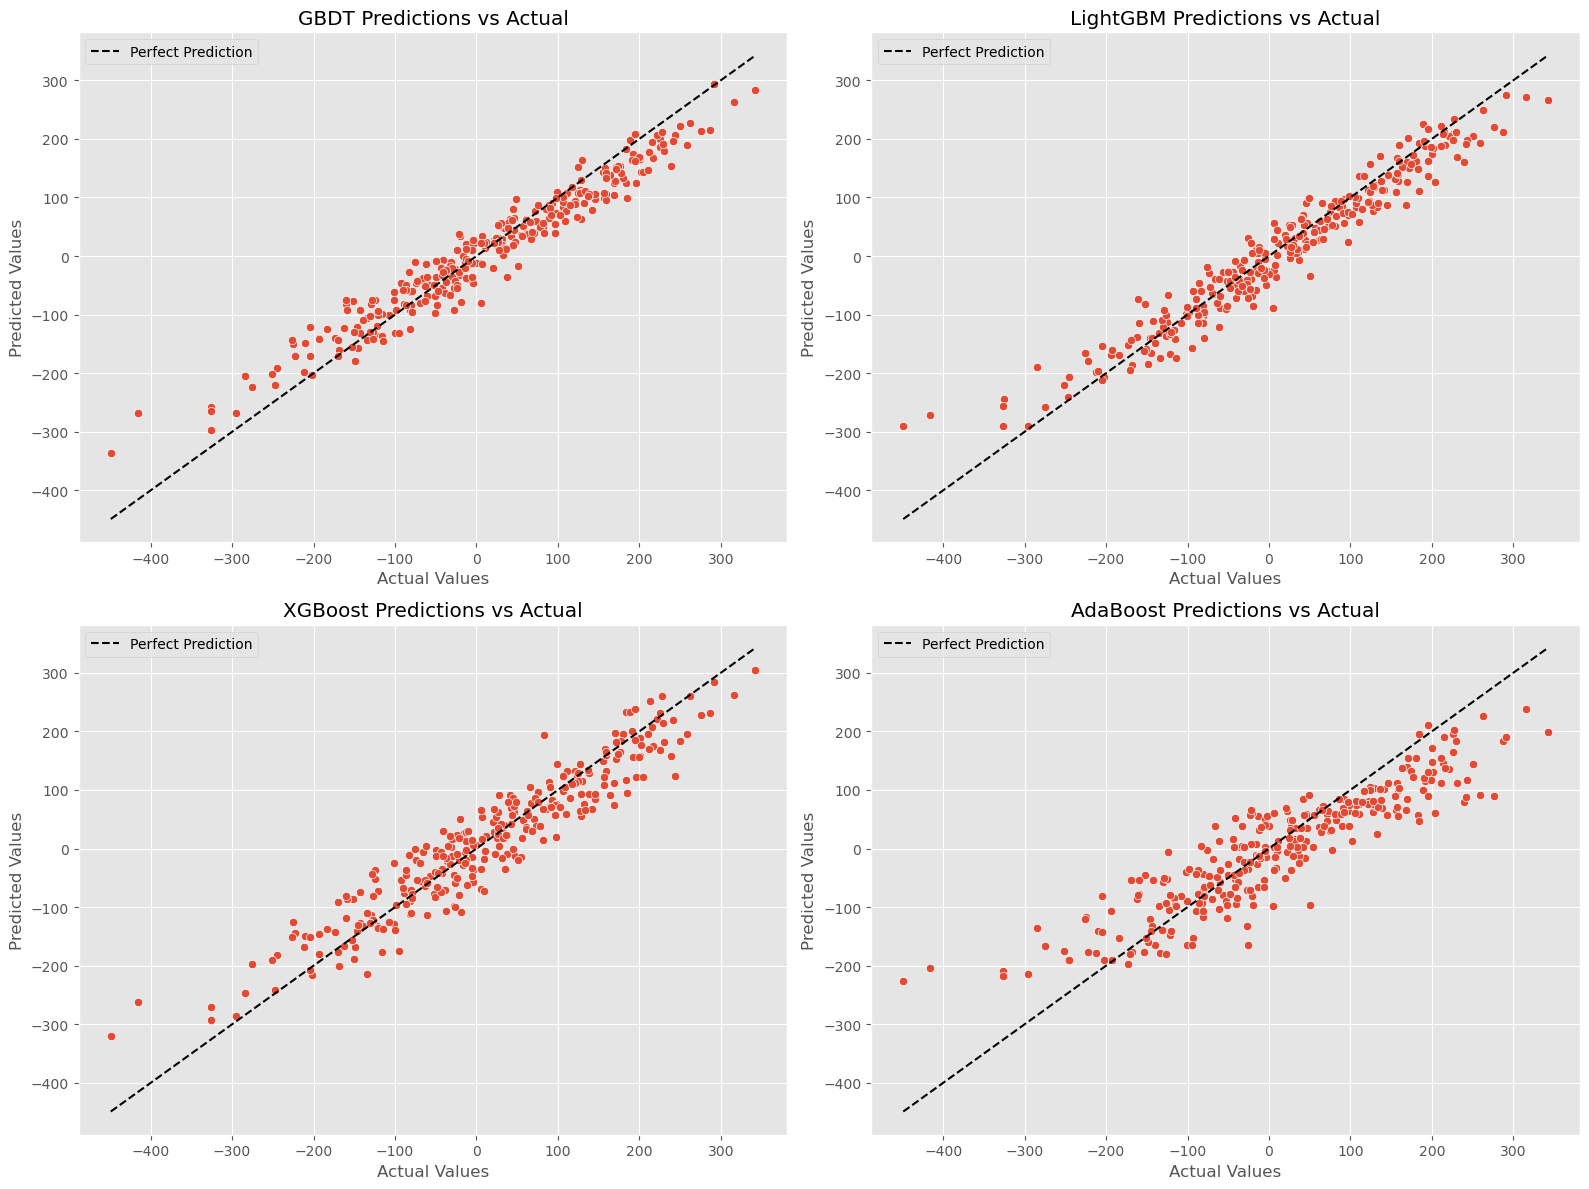

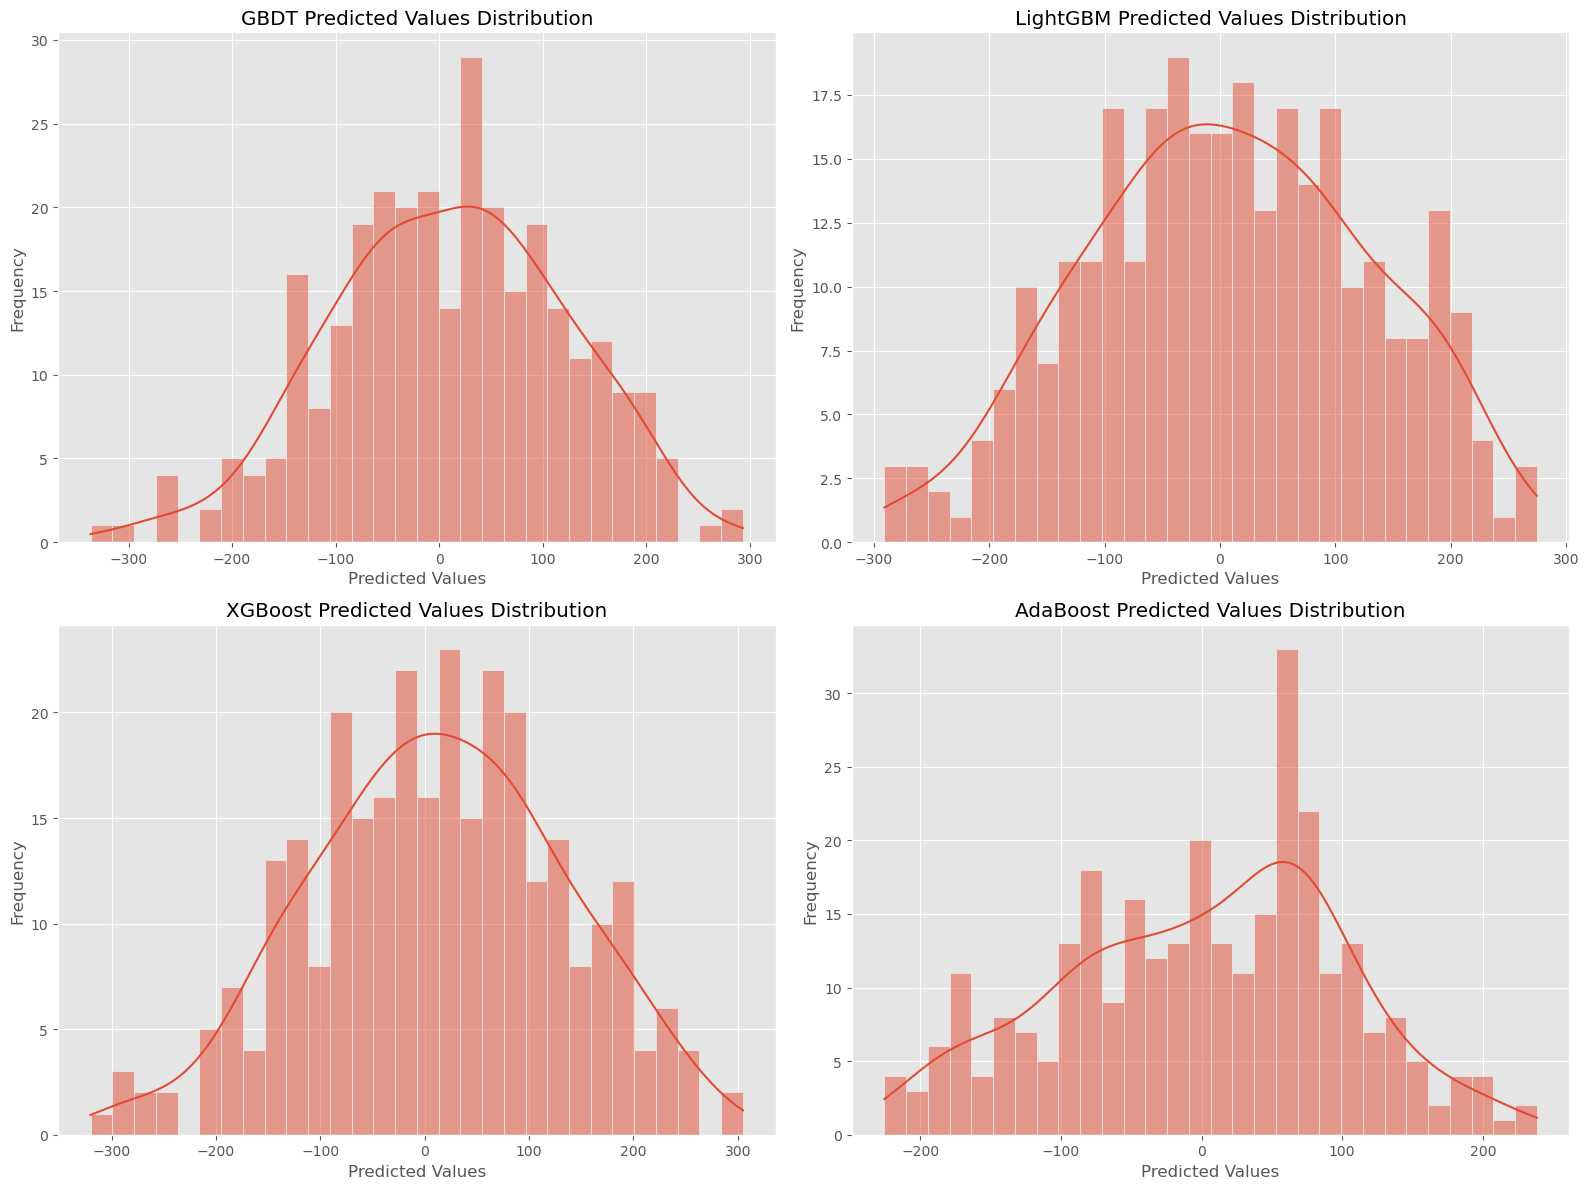

In [17]:
plt.style.use('ggplot')  # 使用有效的样式
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
def plot_predictions(ax, y_true, y_pred, model_name):
    sns.scatterplot(x=y_true, y=y_pred, ax=ax)
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', label='Perfect Prediction')
    ax.set_title(f'{model_name} Predictions vs Actual')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# 预测与实际值对比
plot_predictions(axes[0], y_test, y_pred_gbdt, 'GBDT')
plot_predictions(axes[1], y_test, y_pred_lgb, 'LightGBM')
plot_predictions(axes[2], y_test, y_pred_xgb, 'XGBoost')
plot_predictions(axes[3], y_test, y_pred_ada, 'AdaBoost')

plt.tight_layout()
plt.show()

# 预测值分布图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

def plot_prediction_distribution(ax, y_pred, model_name):
    sns.histplot(y_pred, ax=ax, kde=True, bins=30)
    ax.set_title(f'{model_name} Predicted Values Distribution')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Frequency')

# 绘制预测值的分布
plot_prediction_distribution(axes[0], y_pred_gbdt, 'GBDT')
plot_prediction_distribution(axes[1], y_pred_lgb, 'LightGBM')
plot_prediction_distribution(axes[2], y_pred_xgb, 'XGBoost')
plot_prediction_distribution(axes[3], y_pred_ada, 'AdaBoost')

plt.tight_layout()
plt.show()